# Import Libraries

In [70]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

In [137]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA



# Call pickle

In [4]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)

In [5]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [14]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [10]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Joined  Loaned From  \
0        4.0          4.0          1           10.0    5297            0   
1        4.0          5.0          1            7.0     175            0   
2        5.0          5.0          1           10.0     516            0   
3        3.0          1.0          1            1.0    2741            0   
4        5.0          4.0          1            7.0    1220            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  ...  Club_Reputation  Position_Potential  \
0   93.0        94.0         87.0  ...         2.242424                   2   
1   81.0        76.0         77.0  ...         2.520000                   3   
2   88.0        87.0         78.0  ...         2.233333                   3   
3   21.0        19.0         51.0  ...         2.090909                   0   
4   85.0        83.0         91.0  ...         2.090909                   3   

   Attacking  Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0       85.0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1       87.0   83.2      86.6   90.0  74.833333  27.333333         11.6   
2       79.2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3       22.8   30.2      61.6   43.4  42.666667  16.333333         88.8   
4       80.8   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0      

In [13]:
#Drop unimportant features for recommendation
predictors = predictors.drop(['Jersey Number','Loaned From', 'Joined','Contract Valid Until'], axis = 1)

In [15]:
predictors.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Club_Reputation  \
0          91.0         86.0     91.0  ...         2.242424   
1          89.0         91.0     87.0  ...         2.520000   
2          94.0         90.0     96.0  ...         2.233333   
3          57.0         58.0     60.0  ...         2.090909   
4          78.0         76.0     79.0  ...         2.090909   

   Position_Potential  Attacking  Skill  Movement  Power  Mentality  \
0                   2       85.0   93.4      91.6   75.6  71.500000   
1                   3       87.0   83.2      86.6   90.0  74.833333   
2                   3       79.2   88.8      91.6   70.6  73.833333   
3                   0       22.8   30.2      61.6   43.4  42.666667   
4                   3       80.8   87.2      80.2   82.0  80.833333   

   Defending  GoalKeeping  Potential_Difference  Body Type  Attack_WR  \
0  29.000000         10.8                     0          1          2   
1  27.333333         11.6                     0          2          3   
2  28.000000         11.8                     1          1          3   
3  16.333333         88.8                     2          1          2   
4  59.000000         11.2                     1          2          3   

   Defense_WR  Position_CAM  Position_CB  Position_CDM  Position_CF  \
0           2             0            0             0            0   
1           1             0            0             0            0   
2           2             0            0             0            0   
3           2             0            0             0            0   
4           3             0            0             0            0   

   Position_CM  

In [24]:
len(predictors.columns)

121

In [35]:
numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']
len(numeric_cols) + len(non_numeric_cols)

121

In [38]:
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)



In [41]:
predictors_scaled.head()

Age   Overall  Potential   Special  International Reputation  \
0  1.258441  4.013364   3.697415  2.213984                  9.864420   
1  1.686666  4.013364   3.697415  2.309273                  9.864420   
2  0.187878  3.724114   3.534396  1.997752                  9.864420   
3  0.401990  3.579489   3.534396 -0.465097                  7.326477   
4  0.401990  3.579489   3.371377  2.503515                  7.326477   

   Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
0   1.593944     2.167171 -1.670713 -0.447583  1.818665  1.818665  1.818665   
1   1.593944     3.489672  1.019186  1.091577  1.967451  1.967451  1.967451   
2   3.108090     3.489672 -0.923519 -1.024769  1.620283  1.620283  1.620283   
3   0.079797    -1.800331  1.766380  0.129602 -2.545731 -2.545731 -2.545731   
4   3.108090     2.167171 -0.176325 -0.768242  1.521092  1.521092  1.521092   

         LW        LF        CF        RF        RW       LAM       CAM  \
0  1.901392  1.973099  1.973099  1.973099  1.901392  1.957564  1.957564   
1  1.757292  1.828258  1.828258  1.828258  1.757292  1.716682  1.716682   
2  1.757292  1.779978  1.779978  1.779978  1.757292  1.764859  1.764859   
3 -2.517663 -2.516977 -2.516977 -2.516977 -2.517663 -2.522831 -2.522831   
4  1.661226  1.683417  1.683417  1.683417  1.661226  1.716682  1.716682   

        RAM        LM       LCM        CM       RCM        RM       LWB  \
0  1.957564  1.828702  1.603458  1.603458  1.603458  1.828702  0.646400   
1  1.716682  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
2  1.764859  1.684202  1.454577  1.454577  1.454577  1.684202  0.696360   
3 -2.522831 -2.554472 -2.565223 -2.565223 -2.565223 -2.554472 -2.551047   
4  1.716682  1.684202  1.752340  1.752340  1.752340  1.684202  1.295881   

        LDM       CDM       RDM       RWB        LB       LCB        CB  \
0  0.519988  0.519988  0.519988  0.646400  0.427328 -0.114632 -0.114632   
1  0.519988  0.519988  0.519988  0.696360  0.527106  0.174842  0.174842   
2  0.470696  0.470696  0.470696  0.696360  0.477217 -0.114632 -0.114632   
3 -2.486788 -2.486788 -2.486788 -2.551047 -2.516127 -2.382176 -2.382176   
4  1.308650  1.308650  1.308650  1.295881  1.125774  0.802035  0.802035   

        RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0 -0.114632  0.427328  1.865922   2.532567         1.018552      2.130287   
1  0.174842  0.527106  1.865922   2.481351         2.111799      1.518005   
2 -0.114632  0.477217  1.593650   2.122842         0.558238      1.722099   
3 -2.382176 -2.516127 -1.782517  -1.667116        -1.800873     -0.590969   
4  0.802035  1.125774  2.356010   1.866764         0.155463      2.266350   

    Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
0  2.435355   2.201445  2.491426    2.925736     2.237037     2.255198   
1  2.491871   1.725503  1.839066    1.895887     1.584613     2.135338   
2  2.322322   2.148563  2.219609    2.525239     1.649855     2.195268   
3 -1.690356  -1.976272 -1.422733   -1.365303    -0.111691    -0.981022   
4  2.209288   1.619738  2.056519    2.296384     2.498007     1.955548   

   Acceleration  SprintSpeed   Agility  Reactions   Balance  ...  Attacking  \
0      1.767621     1.452129  1.862187   3.680643  2.195382  ...   2.367037   
1      1.633639     1.793436  1.591288   3.791628  0.426820  ...   2.501665   
2      1.968594     1.725175  2.200811   3.569658  1.417214  ...   1.976617   
3     -0.510075    -0.459193 -0.237281   3.125717 -1.483228  ...  -1.819883   
4      0.896737     0.769514  1.049490   3.236703  0.922017  ...   2.084319   

      Skill  Movement     Power  Mentality  Defending  GoalKeeping  \
0  2.652691  2.491225  1.477531   1.581089  -0.874941    -0.333393   
1  2.010038  2.044295  2.777910   1.853981  -0.956497    -0.286336   
2  2.362867  2.491225  1.026010   1.772114  -0.923875    -0.274572   
3 -1.329238 -0.190353 -1.430261  -0.779428  -1.494763     4.254638   
4  2.262059  1

# Similar Player Recommendation

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(predictors_scaled)

#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices = recommendations.kneighbors(predictors_scaled)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def recommend_me(player):
    index = get_index(player)
    recommend_list = []
    for i in player_indices[index][1:]:
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    return recommend_list


In [332]:
player = input("Enter the player you are looking for: \n")

recommendation = recommend_me(player)

print("Here are 5 players similar to " +  player + ': \n \n' + str(recommendation[1:]))

Enter the player you are looking for: 
E. Hazard
Here are 5 players similar to E. Hazard: 
 
['M. Reus', 'S. Agüero', 'Neymar Jr', 'P. Dybala', 'L. Messi']


In [388]:
rador_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [398]:
def SkillChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    
    colors = ['black', 'blue', 'red', 'green', 'gold', 'pink', 'lightskyblue', 'orange']
    
    for i in range(len1):
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = colors[i])
        ax.fill(angles, values, colors[i], alpha=0.1)
        plt.figtext(0.8, 0.2, ("Recommended Players for "+player_name[0]), color = 'black', fontsize=12)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = colors[i], fontsize=12)
    
    plt.show()

In [399]:
standard_player = predictors[rador_variables][fifa.Name.isin(recommendation)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))
standard_player = standard_player.loc[recommendation,:]

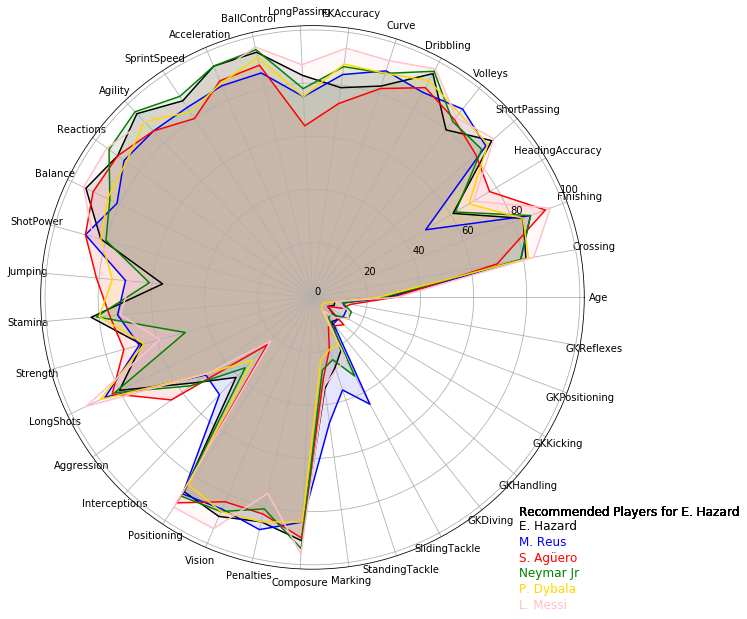

In [400]:
SkillChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Function for filtering for specific Overall & Position

Function = filter_players(position, ovr_min = 0, ovr_max= 100) 
- Accepts a position name and overall range and returns a filtered dataframe of the players that meet those criteria. For positions with few players (LS,RS, etc.) it also returns players from the most similar position (so its not as limited).

In [134]:
def filter_players(position, ovr_min = 0, ovr_max= 100):
    if str(position) == 'RF':
        indices = list(fifa[(fifa['Position'].isin(['RF','RS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LF':
        indices = list(fifa[(fifa['Position'].isin(['LF','LS'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'LAM':
        indices = list(fifa[(fifa['Position'].isin(['LAM','LM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    elif str(position) == 'RAM':
        indices = list(fifa[(fifa['Position'].isin(['RAM','RM'])) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    else:
        indices = list(fifa[(fifa['Position'] == position) & (fifa['Overall'] <= ovr_max) & 
                        (fifa['Overall'] >= ovr_min)].index.values)
    global filtered_df

    filtered_df = predictors_scaled.iloc[indices,:]
    
    return filtered_df
    

In [135]:
posit = input("Enter the position looking for: \n")
over_min = input("What is the min overall?: \n")
over_max = input("What is the max overall?: \n")

filtered_players = filter_players(str(posit), int(over_min), int(over_max))

print("Here are the filtered players based on your criteries: ")
filtered_players

Enter the position looking for: 
LS
What is the min overall?: 
80
What is the max overall?: 
81
Here are the filtered players based on your criteries: 


Age   Overall  Potential   Special  International Reputation  \
329 -0.668573  2.133236   2.393263  1.543297                  4.788534   
330  1.044328  2.133236   1.578167  1.781519                 -0.287351   
345 -0.026235  2.133236   2.067225  1.169472                 -0.287351   
346  1.258441  2.133236   1.578167  1.048529                  4.788534   
411  2.329004  2.133236   1.578167  1.279421                  2.250592   
441 -0.668573  1.988611   2.230244  1.535968                 -0.287351   
461  1.044328  1.988611   1.415148  1.495653                 -0.287351   
540  1.472553  1.988611   1.415148  0.762662                  4.788534   
553  1.900779  1.988611   1.415148  1.052194                  4.788534   

     Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
329   1.593944     2.167171 -0.923519 -0.768242  1.223520  1.223520  1.223520   
330   1.593944     2.167171 -0.176325 -0.768242  1.223520  1.223520  1.223520   
345   1.593944     0.844670 -1.670713 -0.896505  1.372306  1.372306  1.372306   
346  -1.434349     0.844670 -0.176325  0.257865  1.372306  1.372306  1.372306   
411   0.079797     2.167171 -0.475202 -0.062793  1.173925  1.173925  1.173925   
441   1.593944     0.844670 -0.176325  0.257865  1.322711  1.322711  1.322711   
461   1.593944     2.167171  0.271992 -0.575847  1.322711  1.322711  1.322711   
540   1.593944     0.844670  1.019186  1.925289  1.273115  1.273115  1.273115   
553   1.593944     0.844670  0.570870  0.514392  1.273115  1.273115  1.273115   

           LW        LF        CF        RF        RW       LAM       CAM  \
329  1.324993  1.297174  1.297174  1.297174  1.324993  1.234920  1.234920   
330  1.373027  1.297174  1.297174  1.297174  1.373027  1.283096  1.283096   
345  1.084827  1.200613  1.200613  1.200613  1.084827  0.994038  0.994038   
346  1.084827  1.248893  1.248893  1.248893  1.084827  1.042214  1.042214   
411  1.324993  1.297174  1.297174  1.297174  1.324993  1.331272  1.331272   
441  1.180894  1.200613  1.200613  1.200613  1.180894  1.090391  1.090391   
461  1.228927  1.297174  1.297174  1.297174  1.228927  1.283096  1.283096   
540  0.892694  1.055772  1.055772  1.055772  0.892694  0.849509  0.849509   
553  1.132860  1.200613  1.200613  1.200613  1.132860  1.138567  1.138567   

          RAM        LM       LCM        CM       RCM        RM       LWB  \
329  1.234920  1.250702  1.007932  1.007932  1.007932  1.250702  0.646400   
330  1.283096  1.298868  1.156814  1.156814  1.156814  1.298868  0.946161   
345  0.994038  0.961701  0.610915  0.610915  0.610915  0.961701  0.046879   
346  1.042214  1.009868  0.710169  0.710169  0.710169  1.009868  0.096839   
411  1.331272  1.250702  1.206441  1.206441  1.206441  1.250702  0.496520   
441  1.090391  1.106201  0.908678  0.908678  0.908678  1.106201  0.696360   
461  1.283096  1.106201  1.107187  1.107187  1.107187  1.106201  0.396599   
540  0.849509  0.769034  0.561288  0.561288  0.561288  0.769034 -0.003081   
553  1.138567  1.009868  0.759796  0.759796  0.759796  1.009868  0.096839   

          LDM       CDM       RDM       RWB        LB       LCB        CB  \
329  0.421405  0.421405  0.421405  0.646400  0.477217  0.126596  0.126596   
330  0.766445  0.766445  0.766445  0.946161  0.826440  0.512561  0.512561   
345 -0.120800 -0.120800 -0.120800  0.046879 -0.071563 -0.259369 -0.259369   
346  0.076365  0.076365  0.076365  0.096839 -0.021674 -0.114632 -0.114632   
411  0.470696  0.470696  0.470696  0.496520  0.327550  0.030105  0.030105   
441  0.569279  0.569279  0.569279  0.696360  0.626884  0.512561  0.512561   
461  0.470696  0.470696  0.470696  0.396599  0.277661  0.126596  0.126596   
540  0.027074  0.027074  0.027074 -0.003081 -0.071563  0.078350  0.078350   
553  0.027074  0.027074  0.027074  0.096839 -0.021674 -0.114632 -0.114632   

          RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
329  0.126596  0.477217  1.375833   1.610685         0.443159     

# Recommending K nearest players function

Function = recommended_k_players_df(player, k_players = 100) 
-  Accepts a player's name and number of players to recommend and returns a dataframe of the recommended players and a list of their IDs. The recommendations are limited to players from the same position group.

In [446]:
def recommended_k_players_df(player, k_players = 100):
    #Find players' position group
    pos_group = list(fifa.Position_Group[fifa['Name']==player])[0]
    
    #Filter df for that position group
    if pos_group == 'Forward':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Midfielder':
        indices = list(fifa[(fifa.Position_Group == 'Forward')|(fifa.Position_Group == 'Midfielder')].index.values)
    elif pos_group == 'Defender':
        indices = list(fifa[fifa.Position_Group == 'Defender'].index.values)
    elif pos_group == 'GoalKeeper':
        indices = list(fifa[fifa.Position_Group == 'GoalKeeper'].index.values)
    
    predictors_scaled_subset = predictors_scaled.iloc[indices,:]
    predictors_subset = predictors.iloc[indices,:]
    
    #Fit KNN for the k_players within that position group
    recommendations2 = NearestNeighbors(n_neighbors=k_players, algorithm='ball_tree').fit(predictors_scaled_subset)

    #Pass the player name from the dataset to the function and get 5 similar players as output
    player_indices2 = recommendations2.kneighbors(predictors_scaled_subset)[1]
    
    #Get player index
    fifa_subset = fifa.iloc[indices,:]
    index = fifa_subset[fifa_subset['Name']==player].index.tolist()[0]
    
    #Make variables global
    global recommend_list
    global recommended_df
    
    #Create recommended name list
    recommend_list = []
    #for i in player_indices2[index][1:]:
    #        recommend_list.append(fifa_subset.iloc[i]['Name'])
    #recommend_list.insert(0, player)
    
    #Get filtered df of recommended players
    recommended_df = predictors_subset.iloc[list(player_indices2[index][1:]),:]
    
    recommend_list = list(fifa_subset.iloc[list(player_indices2[index][1:]),:].ID)
    
    return recommend_list, display(recommended_df)



In [447]:
recommended_k_players_df('Kangin Lee', k_players=200)

Age  Overall  Potential  Special  Preferred Foot  \
11133   23       64         70     1594               1   
10684   23       65         69     1615               0   
11191   26       64         64     1647               0   
8489    25       67         70     1697               1   
13005   25       63         66     1612               1   
9602    27       66         66     1590               1   
10711   22       65         72     1601               1   
8827    24       66         69     1691               1   
8798    25       66         67     1639               0   
11220   20       64         75     1540               1   
9655    28       66         66     1761               0   
11365   23       64         68     1595               1   
11546   23       64         70     1519               1   
13274   23       62         65     1575               1   
12584   26       63         63     1519               1   
10906   31       65         65     1609               1   
9788    26       66         66     1647               1   
9244    27       66         66     1684               1   
9336    23       66         75     1634               1   
9450    21       66         75     1628               1   
12785   26       63         64     1549               0   
13037   22       63         71     1618               1   
11964   23       64         72     1583               1   
6091    24       69         74     1693               1   
8515    23       67         72     1573               0   
5706    25       69         74     1687               1   
12894   23       63         68     1612               0   
5942    21       69         76     1690               1   
10265   22       65         72     1653               1   
9914    24       66         69     1649               1   
9890    25       66         69     1657               1   
9654    25       66         67     1598               1   
12543   21       63         71     1633               0   
13167   25       62         63     1611               1   
9535    21       66         73     1600               1   
10312   26       65         66     1646               0   
7251    25       68         73     1683               0   
6301    26       69         70     1693               1   
7896    24       67         69     1633               1   
13262   23       62         69     1506               1   
9302    26       66         67     1620               0   
8933    23       66         72     1609               1   
7792    30       67         67     1676               1   
11705   26       64         64     1645               1   
7838    21       67         75     1528               1   
7803    23       67         72     1672               1   
6727    23       68         74     1698               1   
12481   23       63         68     1612               1   
10018   25       65         68     1688               1   
11302   30       64         64     1637               1   
...    ...      ...        ...      ...             ...   
6748    30       68         68     1636               1   
11804   24       64         70     1557               0   
5726    25       69         72     1682               0   
12815   23       63         69     1607               1   
9954    27       65         65     1678               1   
12704   26       63         64     1643               1   
12603   22       63         72     1586               1   
8099    25       67         70     1704               1   
7928    25       67         70     1638               1   
13650   21       62         70     1527               1   
13640   27       62         62     1591               1   
7104    30       68         68     1634               0   
5306    24       70         73     1723               0   
14029   21       61         70     1523               1   
7906    24       67         73     1680               0   
11355   25       64         66     1650               

([11133,
  10684,
  11191,
  8489,
  13005,
  9602,
  10711,
  8827,
  8798,
  11220,
  9655,
  11365,
  11546,
  13322,
  12584,
  10906,
  9788,
  9244,
  9336,
  9450,
  12785,
  13037,
  11964,
  6091,
  8515,
  5706,
  12894,
  5942,
  10265,
  9914,
  9890,
  9654,
  12543,
  13167,
  9535,
  10312,
  7251,
  6301,
  7896,
  13310,
  9302,
  8933,
  7792,
  11705,
  7838,
  7803,
  6727,
  12481,
  10018,
  11302,
  12540,
  9681,
  10784,
  13086,
  6855,
  8025,
  13382,
  10326,
  7478,
  14698,
  9417,
  9353,
  8054,
  7428,
  10255,
  8752,
  13083,
  7140,
  12996,
  7964,
  7876,
  13491,
  4579,
  8292,
  12977,
  13398,
  11292,
  11789,
  11610,
  8754,
  12809,
  14185,
  11215,
  7805,
  12599,
  11439,
  4751,
  10490,
  11428,
  7978,
  11492,
  9323,
  7874,
  13474,
  9029,
  8374,
  4907,
  7872,
  12843,
  8904,
  7372,
  9493,
  6555,
  12654,
  13287,
  10156,
  8940,
  13806,
  6416,
  9930,
  5536,
  9137,
  5759,
  6890,
  8373,
  6504,
  11555,
  9083,
  

In [448]:
recommended_df.Position_GK.sum() #Checking that no GKs were recommended in the DF

0

In [450]:
recommended_names = fifa.Name[fifa.ID.isin(recommend_list)]

2928            Pere Milla
4579            W. Montoya
4715          M. Rodriguez
4751     N. Sarenren Bazee
4896               Rodolfo
4907         N. Mihajlović
4949              Y. Kalfa
5014         V. van Crooij
5159            Wei Shihao
5306              M. Gakpa
5463         M. Terrazzino
5536            T. Eisfeld
5706            F. Álvarez
5726       V. Kalitvintsev
5759           L. Morosini
5813           Q. Cornette
5866          G. Carabajal
5942       Hélder Ferreira
6091             O. Altman
6301           T. Weilandt
6416              J. Ramis
6504            C. O'Dowda
6545              M. Thiel
6555               Arsénio
6632                  Avto
6646                Danilo
6727              E. Berko
6748             T. Dangda
6794             C. Soukou
6855           L. Paganini
6890           Y. Bárcenas
6986        Javi Hernández
7104              V. Amiri
7140               D. Nagy
7146            J. Aguirre
7251            T. Nedelev
7270          Marco Matias
7

In [449]:
fifa[fifa.ID.isin(recommend_list)].Position.unique() #Checking that no GKs were recommended in the list of IDs

array(['CAM', 'RM', 'LW', 'LM', 'LCM', 'RDM', 'ST', 'LS', 'RW', 'RS',
       'LDM', 'RAM', 'CF', 'CM'], dtype=object)

# Clustering Visualizations

In [68]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

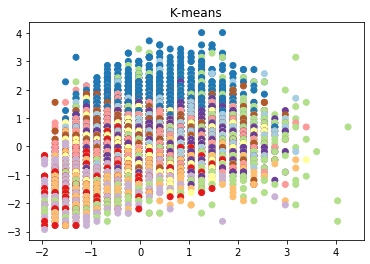

In [71]:
kmeans(predictors_scaled, 10)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

skillsPCA_labels = kmeans.fit_predict(skillsPCA)
In [12]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

#Clustering 1A: Visualize clustering-1 using TSNE (5D > 2D)
#The TSNE here is created from the 5D PCA components. In contrast, later on we will create the TSNE that is based on the original 34 variables. We will see later that the visualized 2D scatter doesn't look to different. However, the computational time required for TSNE from original vector space is much longer

#In [13]:


### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

In [349]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(fifa.Value,5, labels=[1,2,3,4,5])

In [350]:
from sklearn.manifold import TSNE

#scaled = StandardScaler()
#X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(predictors_scaled)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_binned_quantile
dftsne.columns = ['x1','x2','cluster']



Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

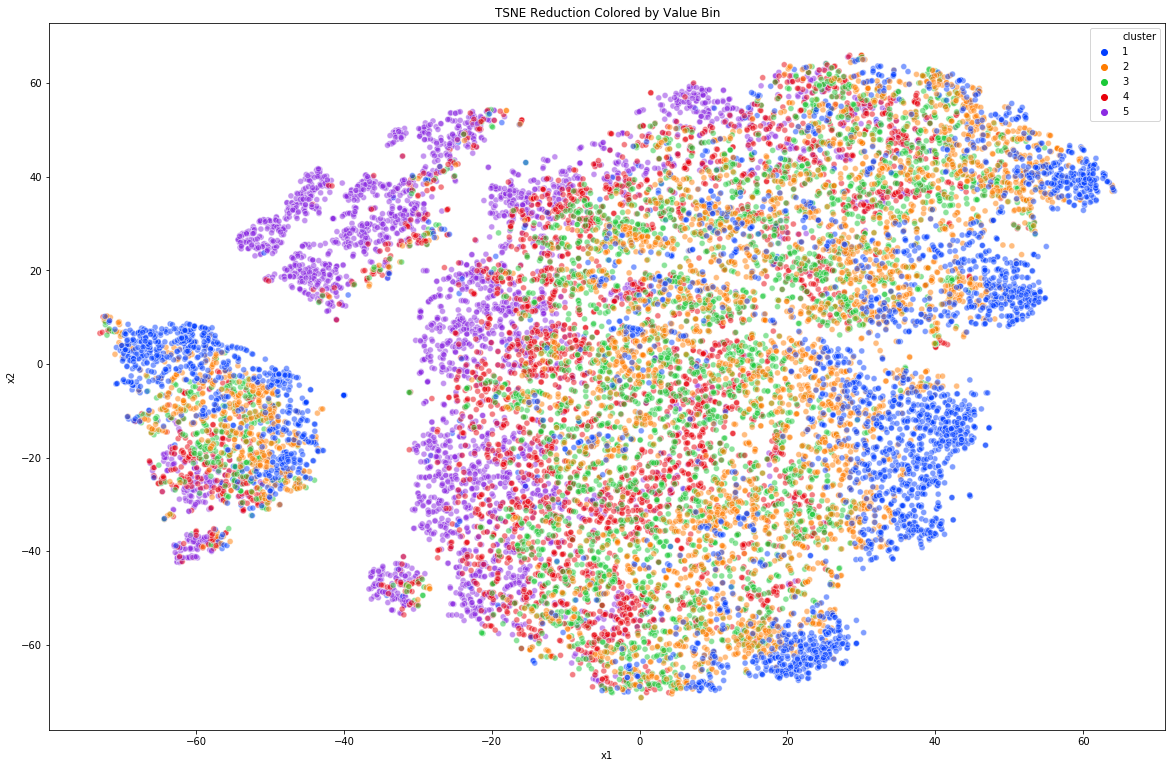

In [351]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [352]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

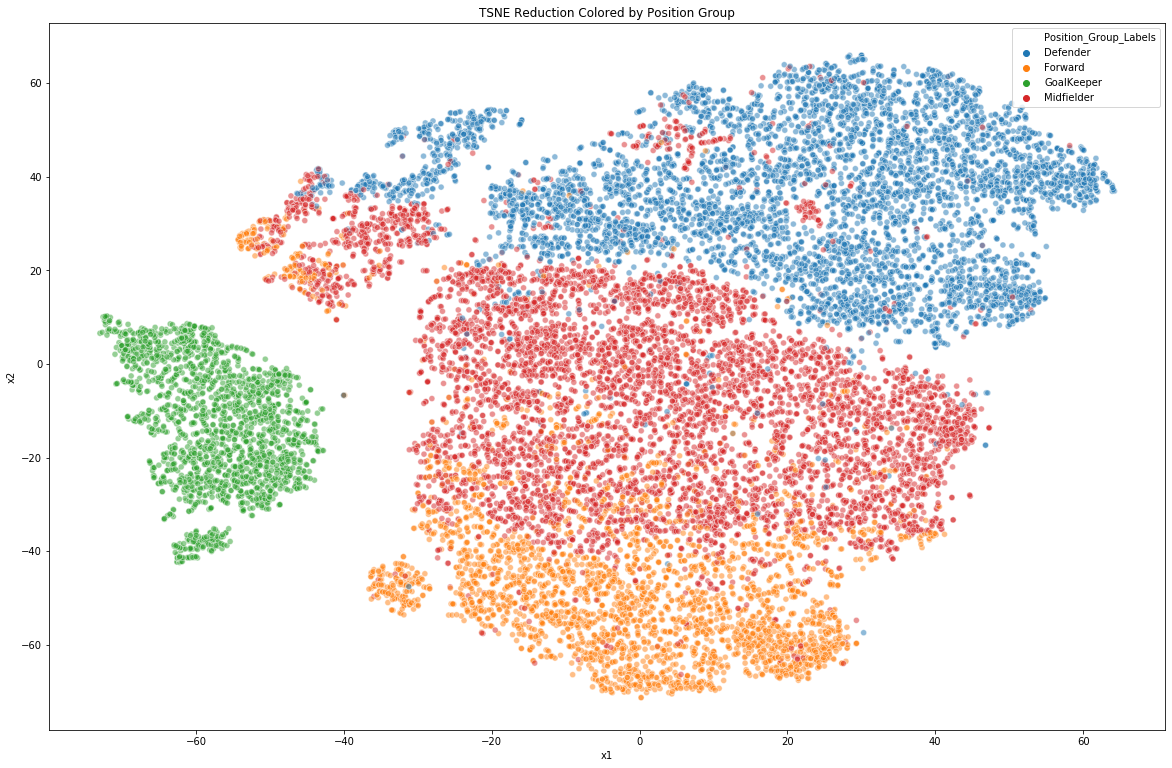

In [353]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

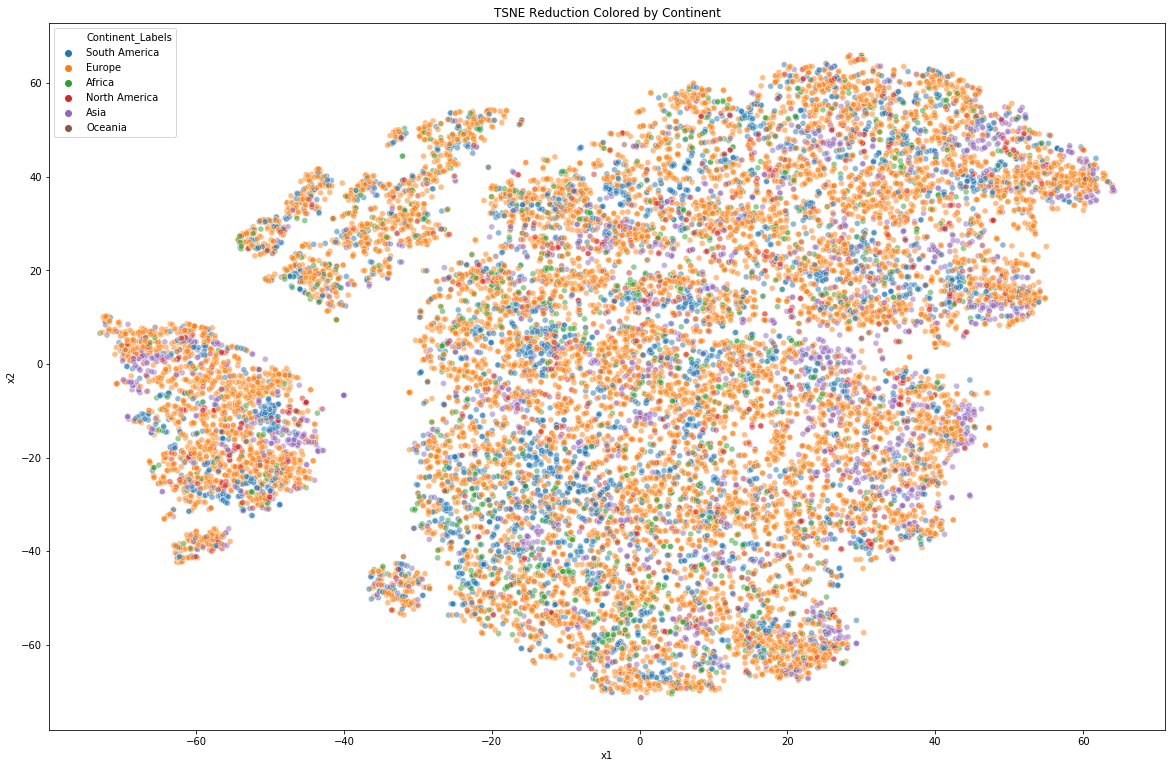

In [354]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [372]:
dftsne['Value'] = fifa.Value

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

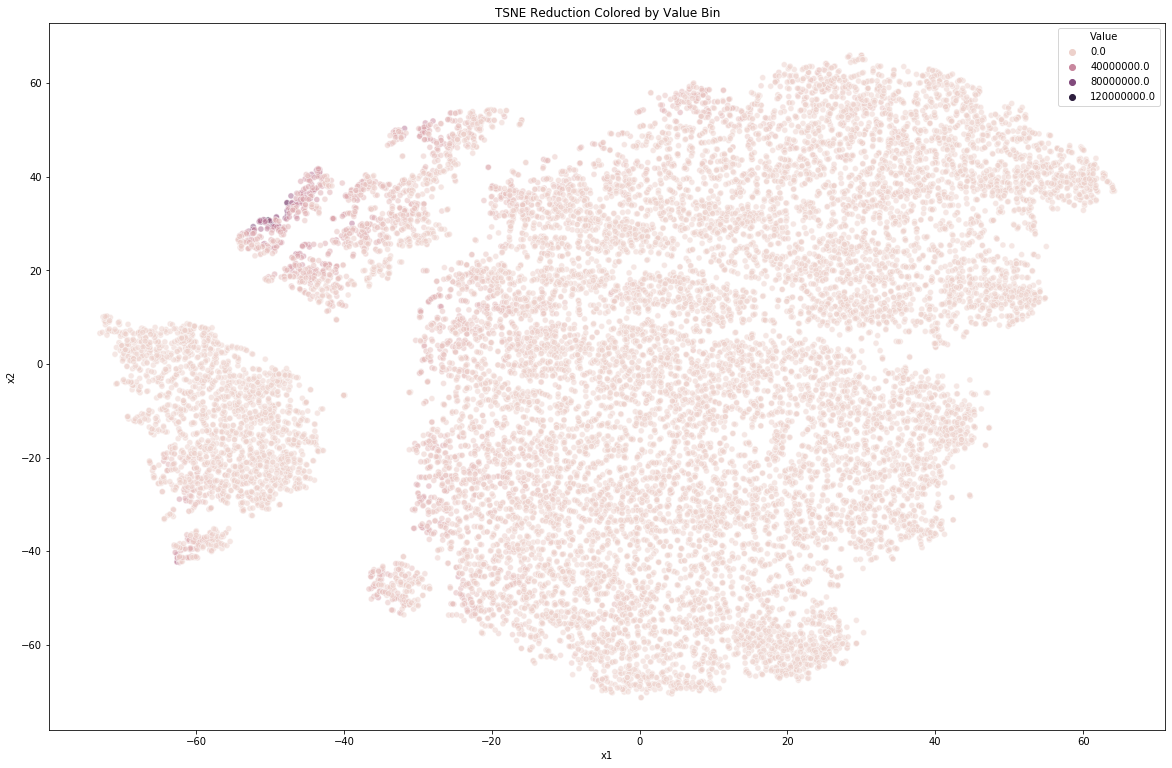

In [375]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Value',alpha=0.5 ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Continuous')




# K-Mean clustering analysis of clusters

In [355]:
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(predictors_scaled)

In [383]:
predictors_w_cluster = predictors.copy()
predictors_w_cluster['cluster'] = clustering_ori

In [384]:
predictors_w_cluster.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Height  Weight  LS  ST  RS  LW  LF  CF  \
0        4.0          4.0          1     170     159  88  88  88  92  93  93   
1        4.0          5.0          1     188     183  91  91  91  89  90  90   
2        5.0          5.0          1     175     150  84  84  84  89  89  89   
3        3.0          1.0          1     193     168   0   0   0   0   0   0   
4        5.0          4.0          1     180     154  82  82  82  87  87  87   

   RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  \
0  93  92   93   93   93  91   84  84   84  91   64   61   61   61   64  59   
1  90  89   88   88   88  88   81  81   81  88   65   61   61   61   65  61   
2  89  89   89   89   89  88   81  81   81  88   65   60   60   60   65  60   
3   0   0    0    0    0   0    0   0    0   0    0    0    0    0    0   0   
4  87  87   88   88   88  88   87  87   87  88   77   77   77   77   77  73   

   LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0   47  47   47  59      84.0       95.0             70.0          90.0   
1   53  53   53  61      84.0       94.0             89.0          81.0   
2   47  47   47  60      79.0       87.0             62.0          84.0   
3    0   0    0   0      17.0       13.0             21.0          50.0   
4   66  66   66  73      93.0       82.0             55.0          92.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
3     13.0       18.0   21.0        19.0         51.0         42.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   

   Acceleration  SprintSpeed  Agility  ...  Position_Potential  Attacking  \
0          91.0         86.0     91.0  ...                   2       85.0   
1          89.0         91.0     87.0  ...                   3       87.0   
2          94.0         90.0     96.0  ...                   3       79.2   
3          57.0         58.0     60.0  ...                   0       22.8   
4          78.0         76.0     79.0  ...                   3       80.8   

   Skill  Movement  Power  Mentality  Defending  GoalKeeping  \
0   93.4      91.6   75.6  71.500000  29.000000         10.8   
1   83.2      86.6   90.0  74.833333  27.333333         11.6   
2   88.8      91.6   70.6  73.833333  28.000000         11.8   
3   30.2      61.6   43.4  42.666667  16.333333         88.8   
4   87.2      80.2   82.0  80.833333  59.000000         11.2   

   Potential_Difference  Body Type  Attack_WR  Defense_WR  Position_CAM  \
0                     0          1          2           2             0   
1                     0          2          3           1             0   
2                     1          1          3           2             0   
3                     2          1          2           2             0   
4                     1          2          3           3             0   

   Position_CB  Position_CDM  Position_CF  Position_CM  Position_GK  \
0            0             0            0            0            0   
1            0             0            0            0            0   
2            0             0            0            0            0   
3            0             0            0            0            1   
4            0             0      

In [385]:
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
    feature_list = predictors_w_cluster.columns[:-38]
    
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
    
    for i,varname in enumerate(feature_list):
        #     get overall mean for a variable, set lower and upper limit
        mean_overall = df[varname].mean()
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)
        
        #     get cluster mean for a variable
        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()
        
        
        #     create filter to display graph with 0.5 deviation from the mean
        if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
            plot_list.append(varname)
            mean_overall_std = mean_overall/mean_overall
            mean_cluster_std = mean_cluster/mean_overall
            mean_overall_list.append(mean_overall_std)
            mean_cluster_list.append(mean_cluster_std)
            
    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
    
    return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
    
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)
        
        
        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
    ax.set_title('Unique Characteristics of Cluster ' + str(label))
    ax.set_xlabel('Standardized Mean')
    ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
    
    label = np.arange(n_clusters)
    
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    
    plt.tight_layout()
    

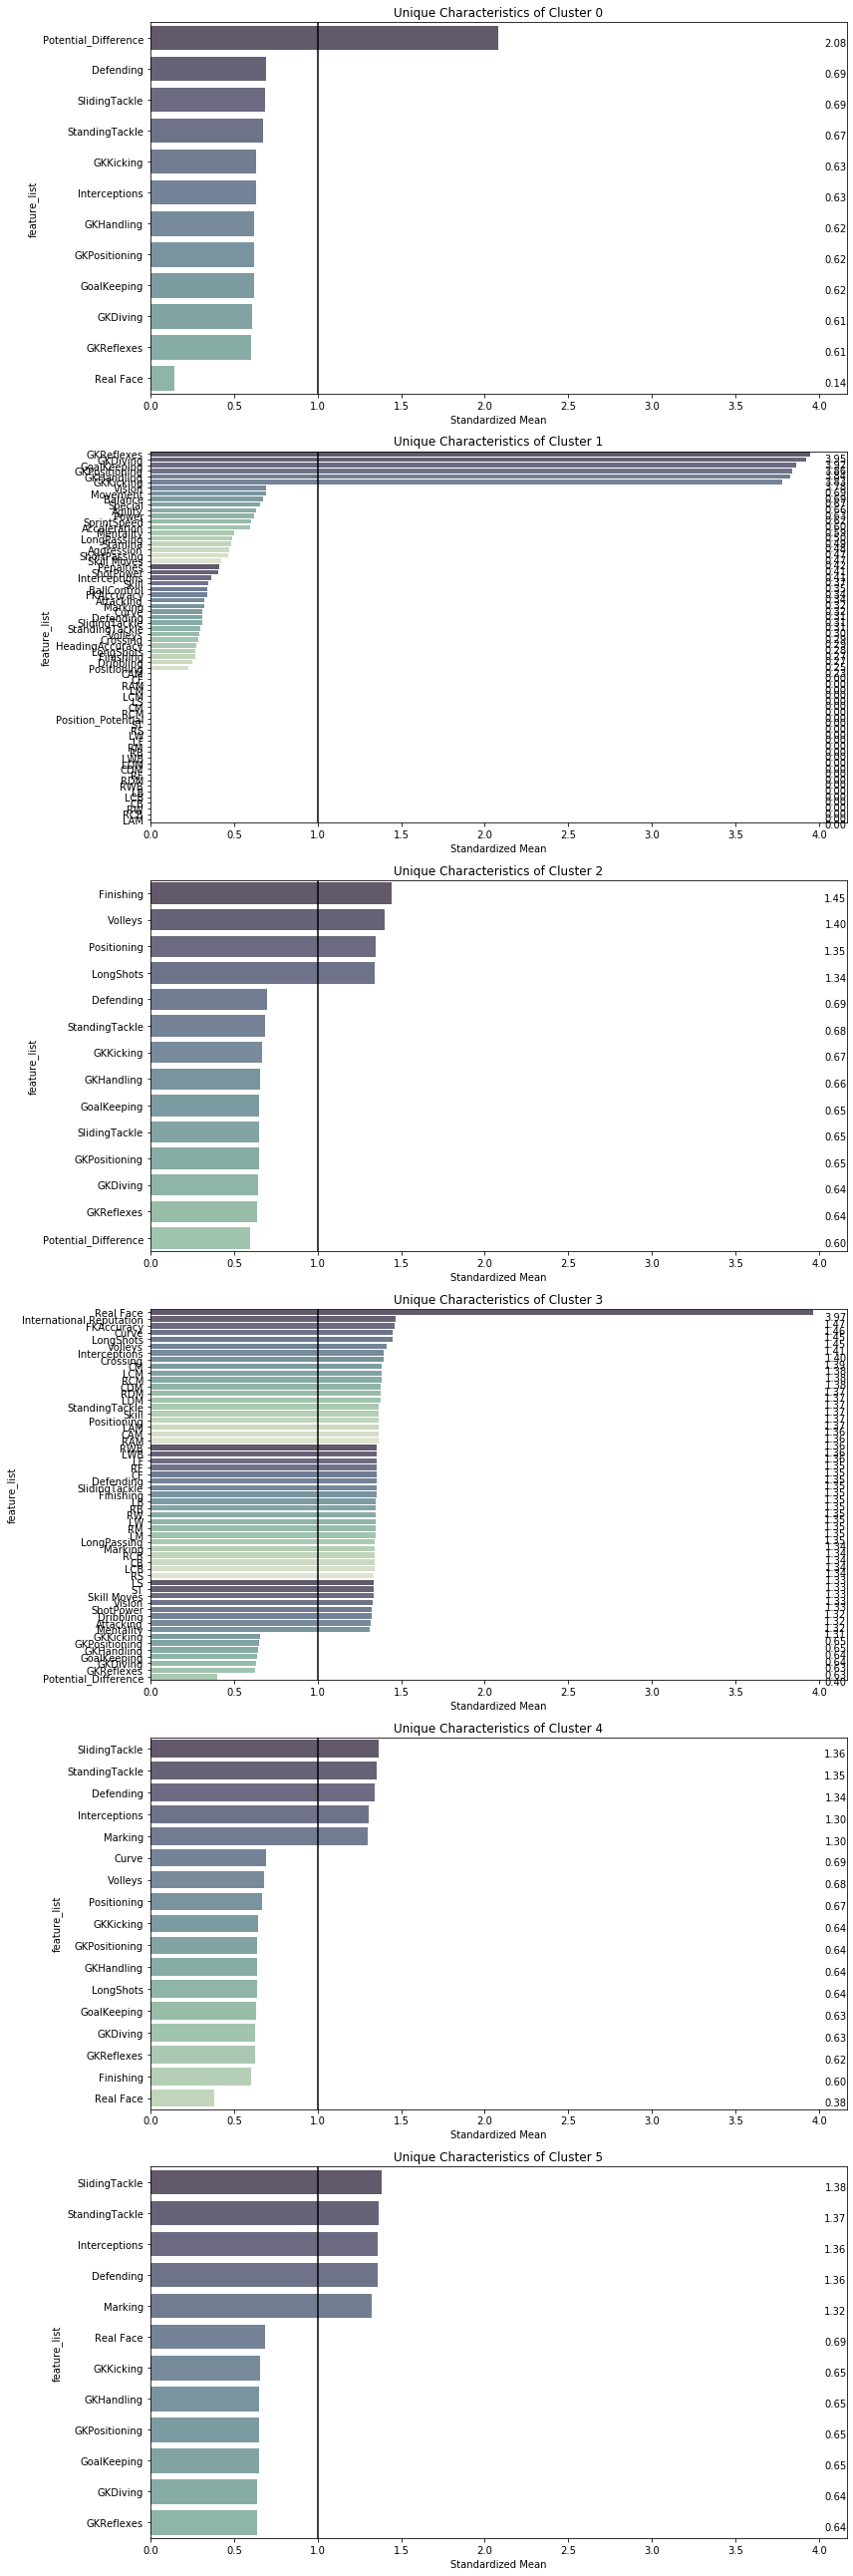

In [387]:
plot_features_all_cluster(df=predictors_w_cluster, label_col='cluster', n_clusters=6, sensitivity=0.3)

# APPENDIX

## Defining an Undervalued Player

In [0]:
#Average time player stays at a team
#avg_stay = (fifa.Joined.mean()/365)*12
#avg_stay

23.415377860859216

In [0]:
#scaled = StandardScaler()

#Average Overall/Potential

#scaled_avg_overpot = scaled.fit_transform(np.array(avg_over_pot).reshape(-1,1))

#Scale Wage & Value
#scaled_wage = scaled.fit_transform(np.array(fifa.Wage).reshape(-1,1))
#scaled_value = scaled.fit_transform(np.array(fifa.Value).reshape(-1,1))

#Average of scaled
#scaled_avg_wagevalue = (scaled_wage+scaled_value)/2


#undervalued_score = scaled_avg_overpot/scaled_avg_wagevalue


#avg_over_pot = (fifa.Overall+fifa.Potential)/2

#avg_value_age = (fifa.Value+(fifa.Wage*avg_stay))/2

#undervalued_score = avg_over_pot/avg_value_age

#maxx = undervalued_score[undervalued_score != np.inf].max()
#undervalued_score.replace(np.inf,maxx,inplace=True)

#undervalued_score_scaled = scaled.fit_transform(np.array(undervalued_score).reshape(-1,1))

In [0]:
#fifa['undervalued_score'] = undervalued_score_scaled

In [0]:
#fifa.sort_values(by = 'undervalued_score', ascending = True).head()

ID          Name  Age Nationality  Overall  Potential  \
2    2     Neymar Jr   26      Brazil       92         93   
0    0      L. Messi   31   Argentina       94         94   
4    4  K. De Bruyne   27     Belgium       91         92   
5    5     E. Hazard   27     Belgium       91         91   
15  15     P. Dybala   24   Argentina       89         94   

                   Club        Value      Wage  Special  Preferred Foot  \
2   Paris Saint-Germain  118500000.0  290000.0     2143               1   
0          FC Barcelona  110500000.0  565000.0     2202               0   
4       Manchester City  102000000.0  355000.0     2281               1   
5               Chelsea   93000000.0  340000.0     2142               1   
15             Juventus   89000000.0  205000.0     2092               0   

    International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
2                        5.0        5.0          5.0      Lean          1   
0                        5.0        4.0          4.0      Lean          1   
4                        4.0        5.0          4.0    Normal          1   
5                        4.0        4.0          4.0    Normal          1   
15                       3.0        3.0          4.0    Normal          1   

   Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
2        LW           10.0     516            0                     4     175   
0        RF           10.0    5297            0                     3     170   
4       RCM            7.0    1220            0                     5     180   
5        LF           10.0    2375            0                     2     173   
15       LF           21.0    1280            0                     4     178   

    Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
2      150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
0      159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
4      154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   
5      163  83  83  83  89  88  88  88  89   89   89   89  89   82  82   82   
15     165  83  83  83  87  86  86  86  87   87   87   87  86   79  79   79   

    RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
2   88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
0   91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
4   88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   
5   89   66   63   63   63   66  60   49  49   49  60      81.0       84.0   
15  86   62   58   58   58   62  56   45  45   45  56      82.0       84.0   

    HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
2              62.0          84.0     84.0       96.0   88.0        87.0   
0              70.0          90.0     86.0       97.0   93.0        94.0   
4              55.0          92.0     82.0       86.0   85.0        83.0   
5              61.0          89.0     80.0       95.0   83.0        79.0   
15             68.0          87.0     88.0       92.0   88.0        88.0   

    LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
2          78.0         95.0          94.0         90.0     96.0       94.0   
0          87.0         96.0          91.0         86.0     91.0       95.0   
4          91.0         91.0          78.0         76.0     79.0       91.0   
5          83.0         94.0          94.0         88.0     95.0       90.0   
15         75.0         92.0          87.0         83.0     91.0       86.0   

    Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
2      84.0       80.0     61.0     81.0      49.0       82.0        56.0   
0      95.0       85.0     68.0     72.0      59.0       94.0        48.0   
4      77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5      94.0       82.0     56.0     83.0      66.0  

In [ ]:
#sns.scatterplot(x ='undervalued_score', y = 'Overall', hue = 'Value', data = fifa)

In [0]:
#numeric_fifa = fifa[['Age', 'Overall', 'Potential',
#                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
 #               'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
  #              'HeadingAccuracy', 'Interceptions','International Reputation',
   #              'Jumping', 'LongPassing', 'LongShots',
    #            'Marking', 'Penalties', 'Positioning',
     #           'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
      #          'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       #         'Volleys']]

#Limit to only popular clubs (reputation over 45)
#numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

#numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
#numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
#numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
#club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


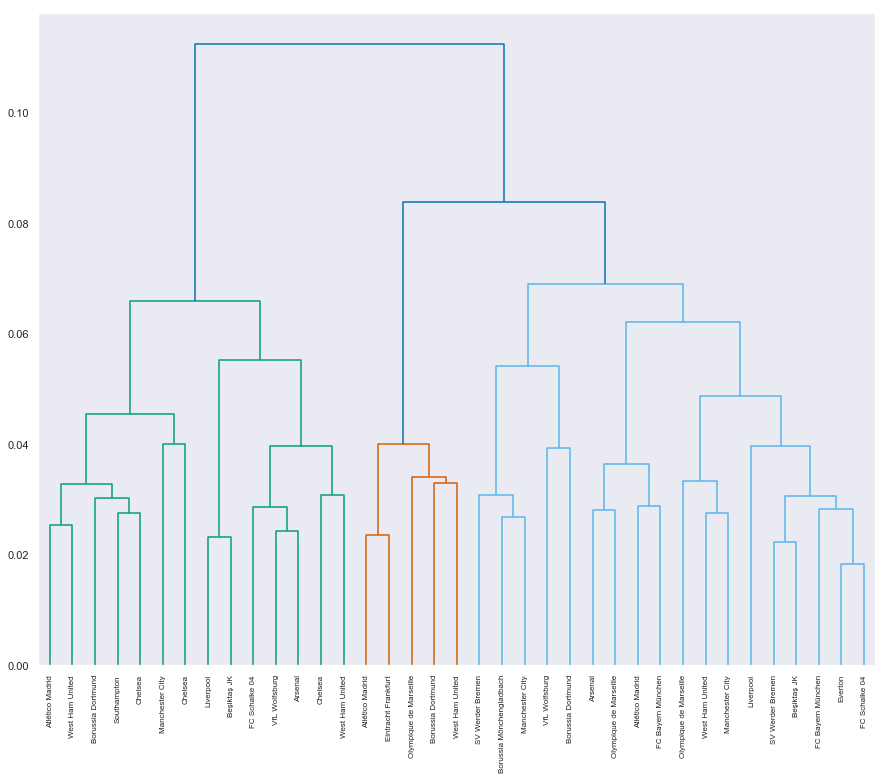

In [0]:
# Any Pre-processing needed?
#normalized_numeric = normalize(numeric_values)
#plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
#mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
#dendrogram(
#    mergings,
#    labels=club_labels,
#    leaf_rotation=90.,
#    leaf_font_size=8)


#plt.show()

In [0]:
#fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

International Reputation
Club                                                   
FC Barcelona                                       74.0
FC Bayern München                                  73.0
Chelsea                                            70.0
Manchester United                                  69.0
Manchester City                                    69.0
Real Madrid                                        69.0
Arsenal                                            67.0
Paris Saint-Germain                                67.0
Borussia Dortmund                                  66.0
Tottenham Hotspur                                  66.0
Liverpool                                          65.0
Juventus                                           63.0
Atlético Madrid                                    62.0
Milan                                              57.0
West Ham United                                    57.0
Napoli                                             54.0
FC Porto                                           53.0
Fenerbahçe SK                                      52.0
Roma                                               52.0
Inter                                              52.0
Beşiktaş JK                                        51.0
Lazio                                              51.0
Everton                                            51.0
Villarreal CF                                      50.0
AS Monaco                                          50.0
Sevilla FC                                         49.0
Valencia CF                                        48.0
Olympique de Marseille                             48.0
Borussia Mönchengladbach                           47.0
VfL Wolfsburg                                      47.0
Eintracht Frankfurt                                46.0
Ajax                                               46.0
FC Schalke 04                                      46.0
SV Werder Bremen                                   46.0
Leicester City                                     46.0
Sporting CP                                        46.0
Southampton                                        46.0
TSG 1899 Hoffenheim                                45.0
Stoke City                                         45.0
Crystal Palace                                     45.0
Wolverhampton Wanderers                            44.0
SL Benfica                                         44.0
Athletic Club de Bilbao                            44.0
Hertha BSC                                         43.0
Bayer 04 Leverkusen                                43.0
Medipol Başakşehir FK                              42.0
FC Augsburg                                        42.0
Galatasaray SK                                     42.0
Olympique Lyonnais                                 42.0
Newcastle United                                   41.0
...                                                 ...
VfR Aalen                                          24.0
Hobro IK                                           24.0
Śląsk Wrocław                                      24.0
Sandefjord Fotball                                 24.0
Os Belenenses                                      24.0
Oldham Athletic                                    24.0
Crawley Town                                       24.0
Ranheim Fotball                                    24.0
Cheltenham Town                                    24.0
Lillestrøm SK                                      24.0
SG Sonnenhof Großaspach                            24.0
Forest Green Rovers                                24.0
Carlisle United                                    24.0
SV Wehen Wiesbaden                                 24.0
La Berrichonne de Châteauroux                      24.0
IK Start                                           24.0
Strømsgodset IF                                    24.0
IFK Norrköping                                     24.0
GIF Sundsvall                                      23.0

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#position_group_labels = le.fit_transform(fifa.Position_Group)
#